In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE


# **Data Preprocessing**

In [2]:
data = pd.read_excel("data/mean_data.xlsx")
data

,Unnamed: 0,video id,Question 2: Sound (1-5),Question 2.1: Music (1-5),Question 2.2 : Noise control (1-5),Question 2.3 : Speaking Style (1-5),Question 3: Camera (1-5),Question 3.1: Stable (1-5),Question 3.2: Angel diversity (0-1),Question 4: Images (1-5),Question 4.1: Resolution (1-5),Question 4.2: Color (1-5),Question 5: Content (1-5),Question 5.1: Introduction (0-1),Question 5.2: Food description (0-1),Question 6: Reviewer (1-5),Question 6.1: Reviewer emotion is negative - neutral - positive (1-3),Question 6.2: Recommendation (0-1),Question 6.3: Clear information (0-1),Attractive Level (1-5)
0,0,mSg4AmqvT0I,4,4,3,4,4,4,1,5,4,5,4,1,1,3,2,0,1,3
1,1,Lol8sqRfQYE,3,3,1,3,3,2,3,3,3,3,3,1,1,3,3,1,1,2
2,2,kwwGvRUyIG8,4,4,2,3,4,4,1,4,5,4,4,1,1,4,3,1,1,4
3,3,52alUCchcBw,2,2,1,3,3,4,1,2,4,1,3,1,0,2,2,0,1,2
4,4,iDCC0SEHDY8,3,3,2,3,3,4,0,3,4,2,3,1,0,3,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,130,Yr9Z19ZWMfg,4,3,3,4,4,3,1,4,4,4,4,1,1,4,3,1,1,4
131,131,umhYUSmtkIw,3,3,3,3,3,4,1,3,4,3,3,1,1,3,2,0,1,3
132,132,7JsskyOhp0I,4,4,2,4,4,4,1,4,4,4,4,1,1,4,3,1,1,4
133,133,usrgPQ74WVA,3,3,3,3,3,3,1,4,4,4,2,1,1,4,2,0,1,2


In [3]:
data.drop(columns = ['Unnamed: 0', 'video id'], inplace = True)
data.columns = ['sound','music',	'noise_ct',	'speaking_style', 'camera', 'stable','angel','image','resolution','color','content','intro', 'food_desc', 'reviewer', 'rver_emotion', 'recommendation','clear_info','attractive']
data

,sound,music,noise_ct,speaking_style,camera,stable,angel,image,resolution,color,content,intro,food_desc,reviewer,rver_emotion,recommendation,clear_info,attractive
0,4,4,3,4,4,4,1,5,4,5,4,1,1,3,2,0,1,3
1,3,3,1,3,3,2,3,3,3,3,3,1,1,3,3,1,1,2
2,4,4,2,3,4,4,1,4,5,4,4,1,1,4,3,1,1,4
3,2,2,1,3,3,4,1,2,4,1,3,1,0,2,2,0,1,2
4,3,3,2,3,3,4,0,3,4,2,3,1,0,3,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,4,3,3,4,4,3,1,4,4,4,4,1,1,4,3,1,1,4
131,3,3,3,3,3,4,1,3,4,3,3,1,1,3,2,0,1,3
132,4,4,2,4,4,4,1,4,4,4,4,1,1,4,3,1,1,4
133,3,3,3,3,3,3,1,4,4,4,2,1,1,4,2,0,1,2


## **Data visualization**

Class=2, n=43 (31.852%)
Class=1, n=30 (22.222%)
Class=3, n=43 (31.852%)
Class=4, n=15 (11.111%)
Class=0, n=4 (2.963%)


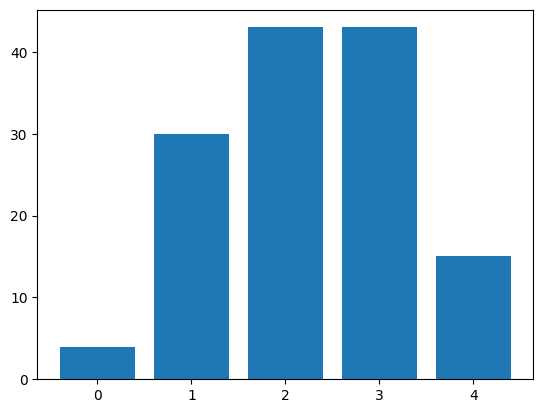

<Figure size 1000x600 with 0 Axes>

In [5]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder

y = data['attractive'].values
y = LabelEncoder().fit_transform(y)

counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.figure(figsize=(10,6))
plt.show()																												


C:\Users\Chi Khang\AppData\Local\Temp\ipykernel_10184\3925628430.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\Chi Khang\AppData\Local\Temp\ipykernel_10184\3925628430.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\Chi Khang\AppData

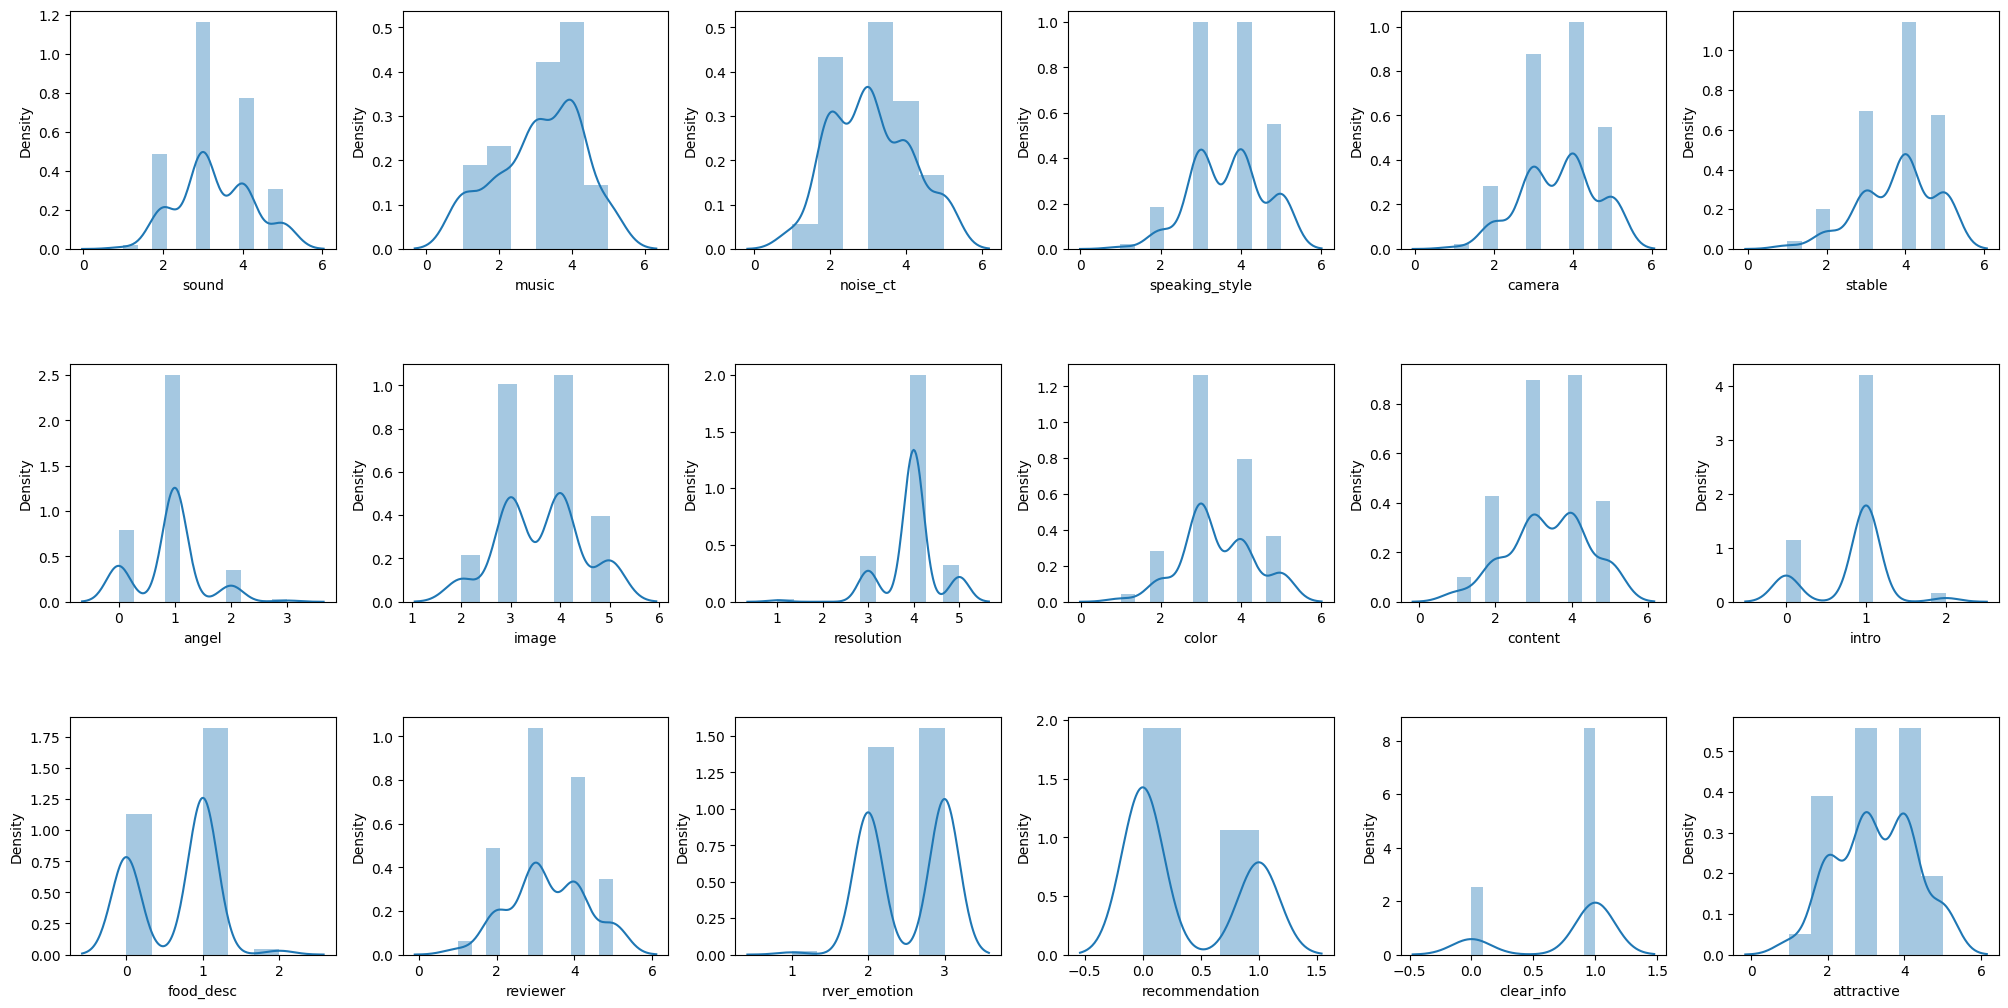

In [6]:
fig, axs = plt.subplots(ncols=6, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

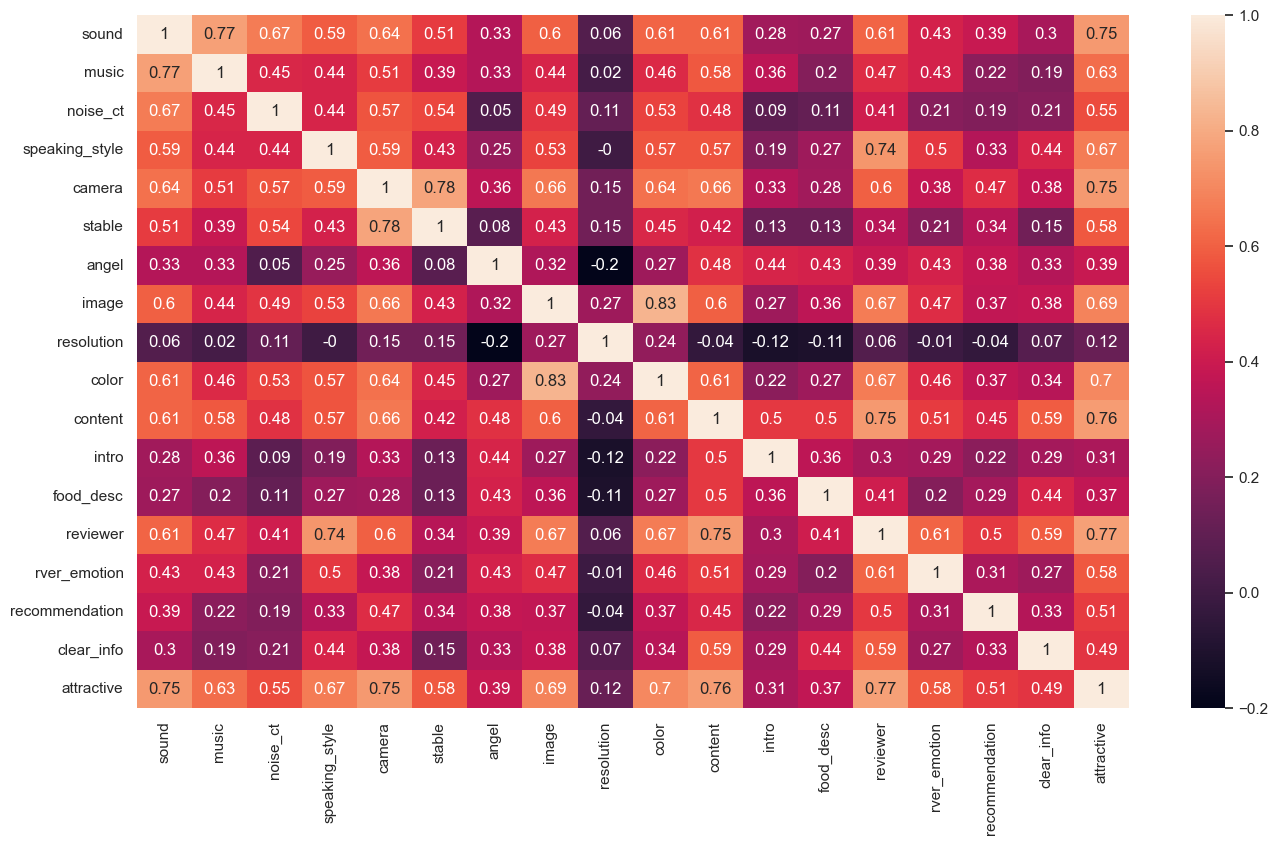

In [7]:
sns.set(rc={'figure.figsize':(16, 9)})
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

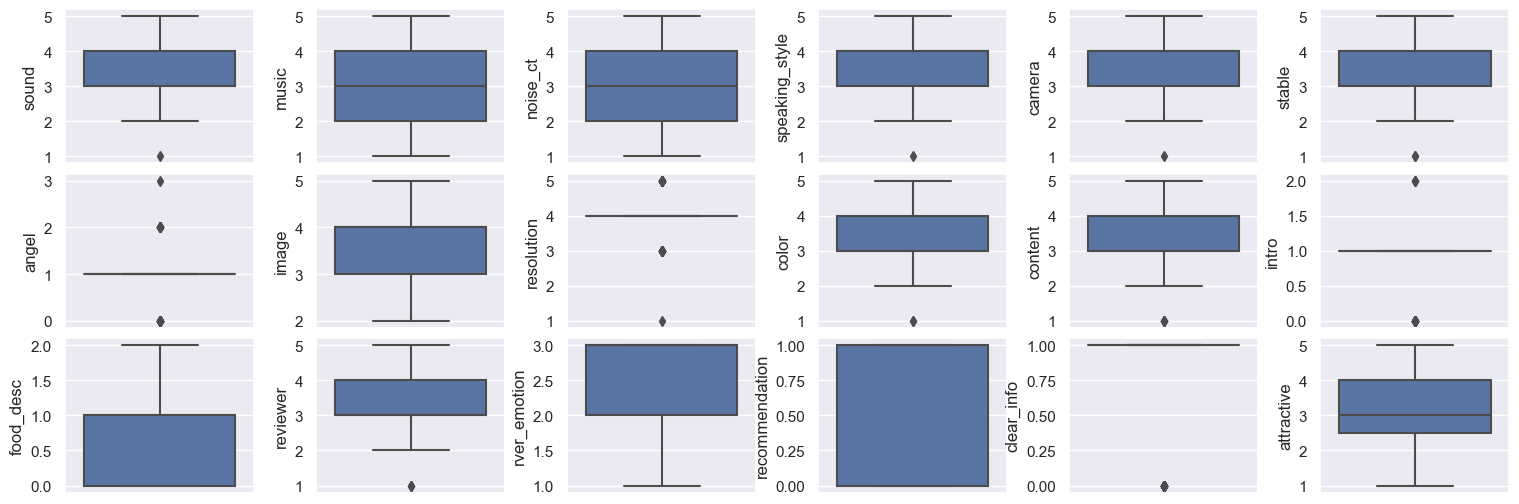

In [8]:
fig, ax = plt.subplots(ncols=6, nrows=3, figsize=(15, 5))

ax = ax.flatten()

index = 0

for i in data.columns:
    sns.boxplot(y=i, data=data, ax=ax[index])
    index += 1
        
plt.tight_layout(pad=0.4)
plt.show()

In [9]:
data_new = data.copy()

for i in data_new.columns:
    data_new.sort_values(by=i, ascending=True, na_position='last')
    q1, q3 = np.nanpercentile(data_new[i], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    mean = data_new[i].mean()
    
    data_new.loc[data_new[i] < lower_bound, [i]] = mean
    data_new.loc[data_new[i] > upper_bound, [i]] = mean

## **Feature Selection and Scaling**

In [10]:
scaler = MinMaxScaler()

def scale_data(data):
    return pd.DataFrame(scaler.fit_transform(data))

In [11]:
# Feature selection
data = data[['sound', 'music', 'noise_ct', 'speaking_style','camera','stable','image','color', 'content', 'reviewer', 'attractive']]
df_scale = scale_data(data)
df_scale.columns = [['sound', 'music', 'noise_ct', 'speaking_style','camera','stable','image','color', 'content', 'reviewer', 'attractive']]

In [12]:
df_scale.head()

,sound,music,noise_ct,speaking_style,camera,stable,image,color,content,reviewer,attractive
0,0.75,0.75,0.50,0.75,0.75,0.75,1.000000,1.00,0.75,0.50,0.50
1,0.50,0.50,0.00,0.50,0.50,0.25,0.333333,0.50,0.50,0.50,0.25
2,0.75,0.75,0.25,0.50,0.75,0.75,0.666667,0.75,0.75,0.75,0.75
3,0.25,0.25,0.00,0.50,0.50,0.75,0.000000,0.00,0.50,0.25,0.25
4,0.50,0.50,0.25,0.50,0.50,0.75,0.333333,0.25,0.50,0.50,0.25


In [13]:
input_linear= data[['sound', 'music', 'noise_ct', 'speaking_style','camera','stable','image','color', 'content', 'reviewer']]

In [14]:
# train test split
from sklearn.model_selection import train_test_split
X_linear_train, X_linear_valid, y_linear_train, y_linear_valid = train_test_split(input_linear, data['attractive'], test_size=0.2, shuffle = True, random_state=0)

Class=4, n=34 (25.185%)
Class=3, n=34 (25.185%)
Class=5, n=11 (8.148%)
Class=2, n=26 (19.259%)
Class=1, n=3 (2.222%)


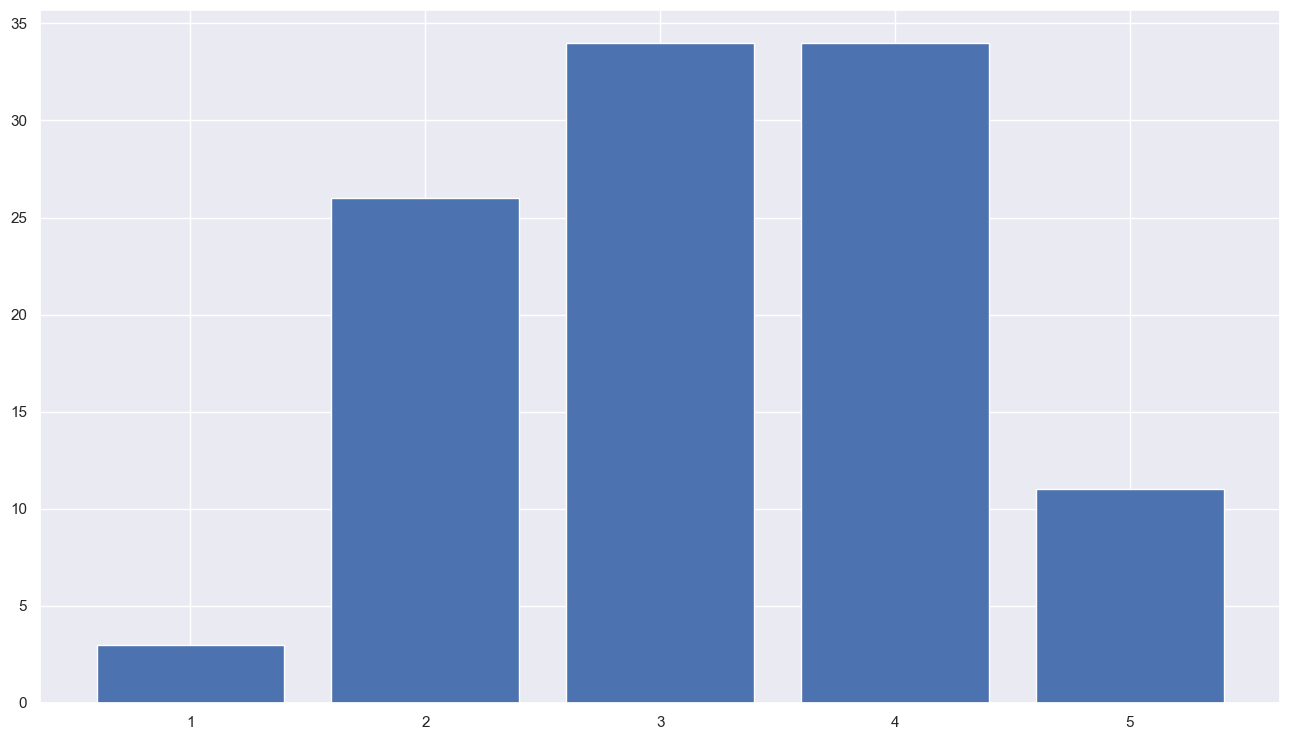

In [15]:
counter = Counter(y_linear_train.values)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.show()

Class=4, n=34 (20.000%)
Class=3, n=34 (20.000%)
Class=5, n=34 (20.000%)
Class=2, n=34 (20.000%)
Class=1, n=34 (20.000%)


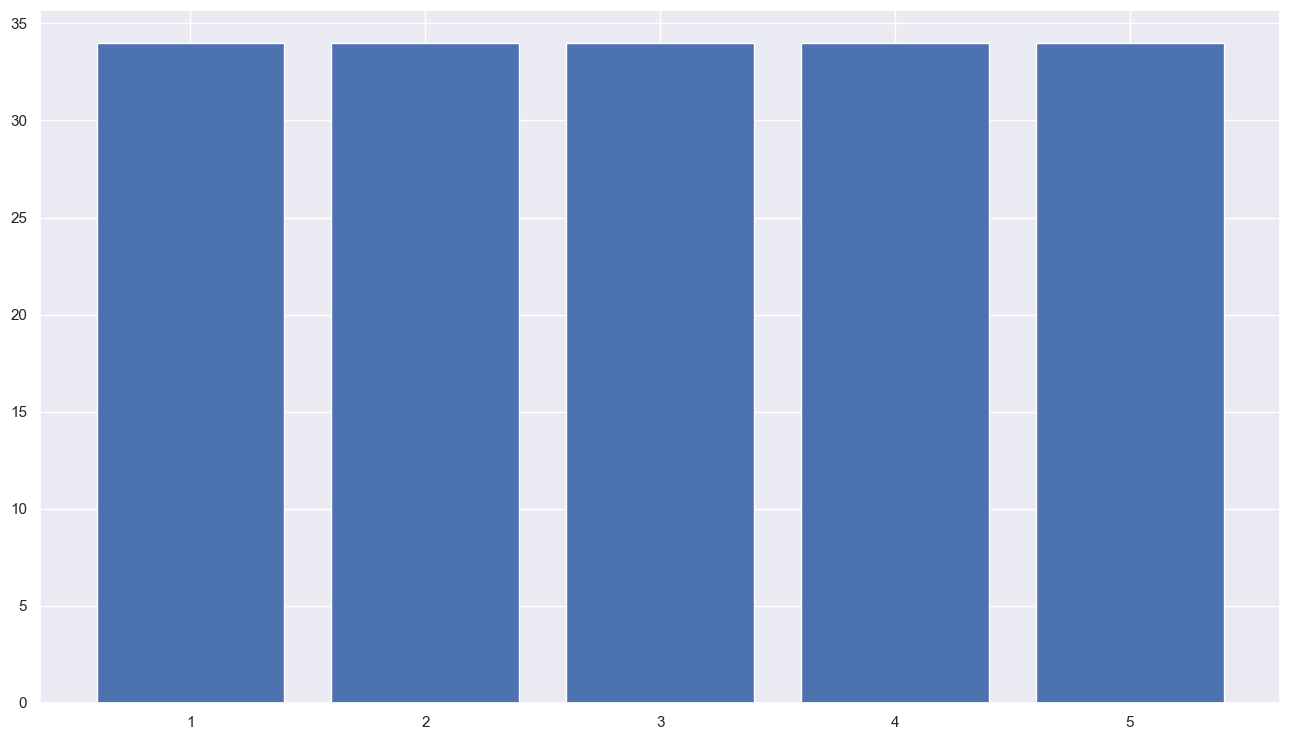

In [16]:

X = X_linear_train.values
y = y_linear_train.values

oversample = SMOTE(k_neighbors=2)
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.show()

In [17]:
def predict(X, weights):
    X = np.array(X)
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X.dot(weights)
    
def evaluate(X, y, weights):
    loss = None
    y_pred = predict(X, weights)
    
    mse_val = metrics.mean_squared_error(y, y_pred)
    rmse_val = np.sqrt(mse_val(y, y_pred))
    mae_val = metrics.mean_absolute_error(y, y_pred)

    print(f"mae: {mae_val}")
    print(f"mse: {mse_val}")
    print(f"rmse: {rmse_val}")

    return mae_val, mse_val, rmse_val

### **Linear Regresion**

In [18]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr2 = LinearRegression()

model_lr.fit(X, y)
model_lr2.fit(X_linear_train, y_linear_train)

LinearRegression()

In [19]:
y_pred = model_lr.predict(X_linear_valid)
y_pred2 = model_lr2.predict(X_linear_valid)

c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

print("Accuracy SMOTE: ",r2_score(y_linear_valid, y_pred))
print("Accuracy without SMOTE: ",r2_score(y_linear_valid, y_pred2))
print("MSE SMOTE: ", metrics.mean_squared_error(y_linear_valid, y_pred))
print("MSE without SMOTE: ", metrics.mean_squared_error(y_linear_valid, y_pred2))



Accuracy SMOTE:  0.6850577827695961
Accuracy without SMOTE:  0.7700154987621836
MSE SMOTE:  0.33265501682772436
MSE without SMOTE:  0.2429191576860339


**K-fold reduce overfitting**

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

l_regression = LinearRegression()
kf = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(l_regression, X_linear_train, y_linear_train, cv=kf, scoring='neg_mean_squared_error')
score1 = cross_val_score(l_regression, X, y, cv=kf, scoring='neg_mean_squared_error')
score2 = cross_val_score(l_regression, X_linear_train, y_linear_train, cv=kf, scoring='r2')
score3 = cross_val_score(l_regression, X, y, cv=kf, scoring='r2')
print("MSE without SMOTE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("MSE with SMOTE: %0.2f (+/- %0.2f)" % (score1.mean(), score1.std()))
print("R2 without SMOTE: %0.2f (+/- %0.2f)" % (score2.mean(), score2.std()))
print("R2 with SMOTE: %0.2f (+/- %0.2f)" % (score3.mean(), score3.std()))


MSE without SMOTE: -0.24 (+/- 0.04)
MSE with SMOTE: -0.23 (+/- 0.01)
R2 without SMOTE: 0.74 (+/- 0.08)
R2 with SMOTE: 0.88 (+/- 0.02)


### **Logistic Regression**

In [22]:
data_log = data.copy()
data_log['attractive'] = data_log['attractive'].apply(lambda x: 1 if x>=3 else 0)
df1 = data_log[data_log['attractive']==0]
df2 = data_log[data_log['attractive']==1]
print(df1.shape)
print(df2.shape)

(34, 11)
(101, 11)


In [23]:
from sklearn.model_selection import train_test_split
input_log = data_log.drop(columns = ['attractive'])
label_log = data_log['attractive']
X_log_train, X_log_val, y_log_train, y_log_val = train_test_split(input_log, label_log ,shuffle = True, test_size=0.2,random_state=0)

Class=1, n=79 (73.148%)
Class=0, n=29 (26.852%)


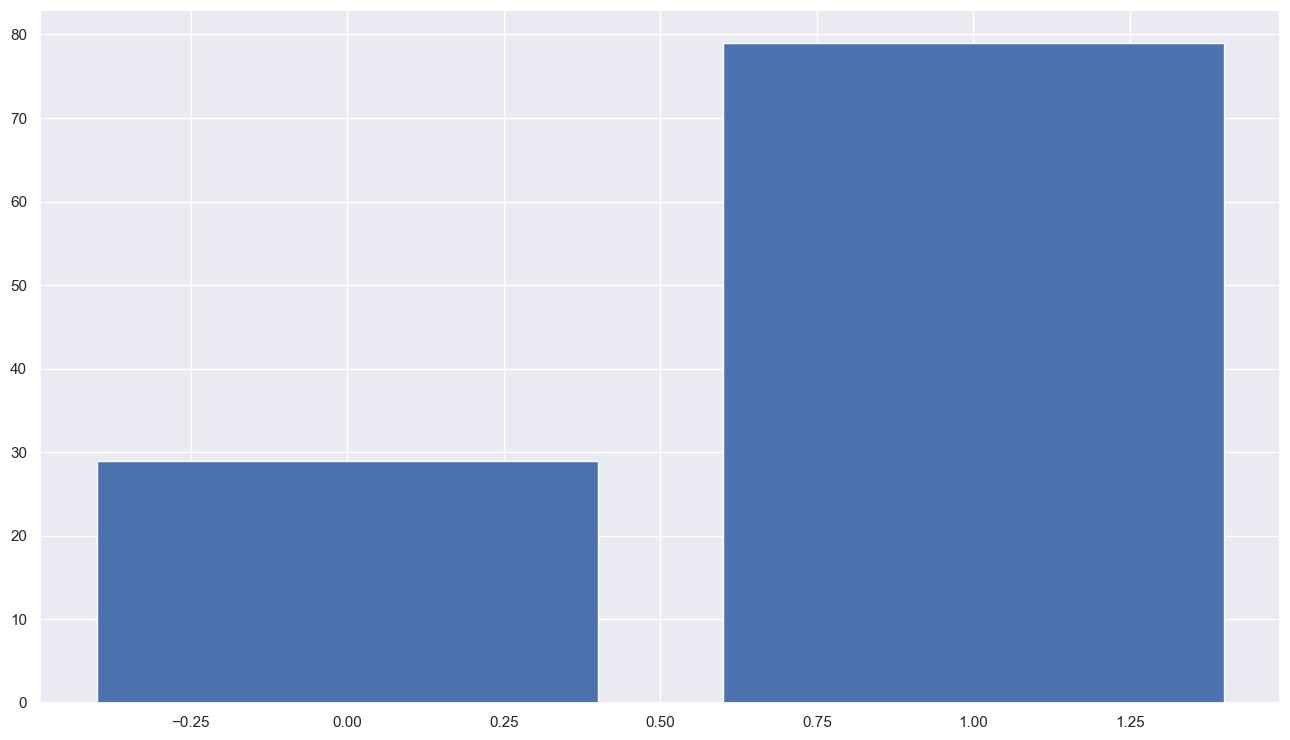

In [24]:
X = X_log_train.values
y = y_log_train.values

counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.show()

Class=1, n=79 (50.000%)
Class=0, n=79 (50.000%)


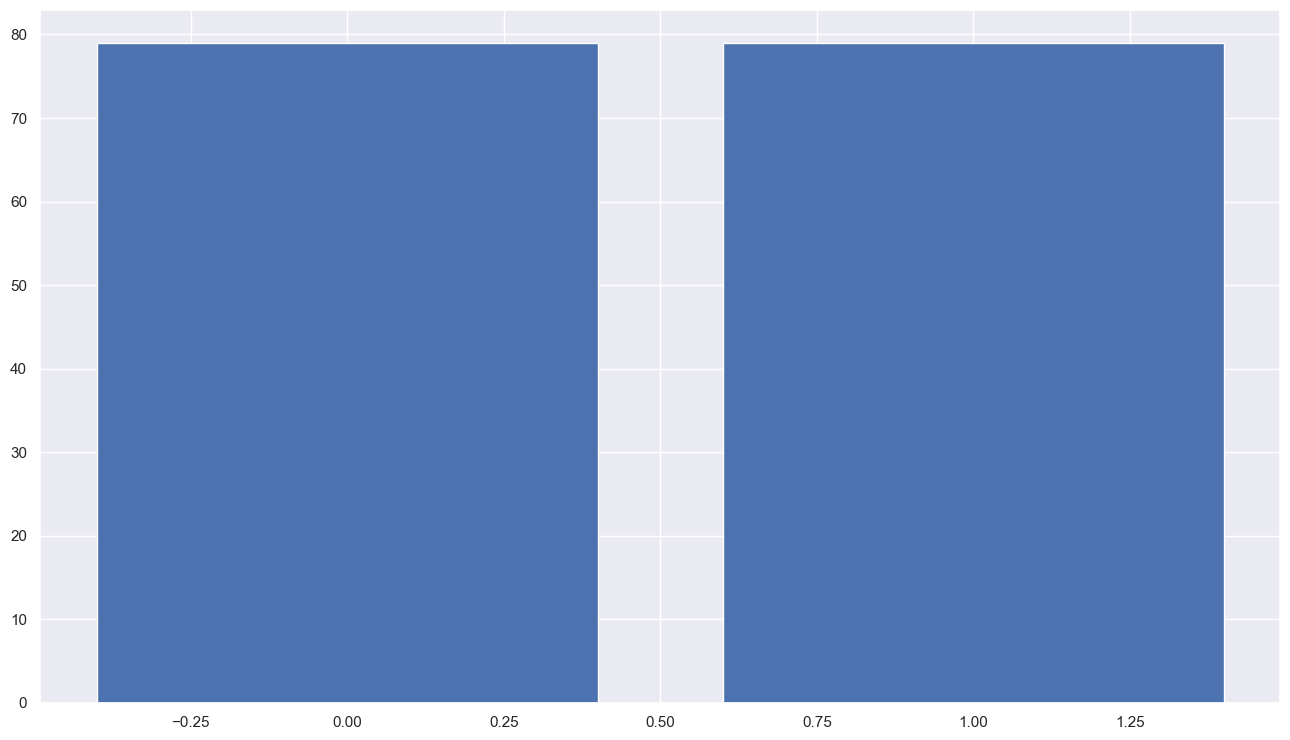

In [25]:
# Augumanted Data

X = X_log_train.values
y = y_log_train.values

oversample = SMOTE(k_neighbors=2)
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression

LoRe = LogisticRegression(random_state=0)
LoRe1 = LogisticRegression(random_state=0)
LoRe.fit(X_log_train, y_log_train)
LoRe1.fit(X, y)

LogisticRegression(random_state=0)

In [27]:
from sklearn import metrics
prediction = LoRe.predict(X_log_val)
print("Without oversampling")
print("Accuracy Score: ",metrics.accuracy_score(y_log_val, prediction))
print("F1 Score: ",metrics.f1_score(y_log_val, prediction))
print("Precision Score: ",metrics.precision_score(y_log_val, prediction))
print("Recall Score: ",metrics.recall_score(y_log_val, prediction))

Without oversampling
Accuracy Score:  0.8888888888888888
F1 Score:  0.9302325581395349
Precision Score:  0.9523809523809523
Recall Score:  0.9090909090909091


In [28]:
predict2 =  LoRe1.predict(X)
print("Oversampling")
print("Accuracy Score: ",metrics.accuracy_score(y, predict2))
print("F1 Score: ",metrics.f1_score(y, predict2))
print("Precision Score: ",metrics.precision_score(y, predict2))
print("Recall Score: ",metrics.recall_score(y, predict2))

Oversampling
Accuracy Score:  0.8987341772151899
F1 Score:  0.8974358974358974
Precision Score:  0.9090909090909091
Recall Score:  0.8860759493670886


### **Multiclassification**

**split train test set**

In [29]:
multi_input = data.drop(columns = ['attractive'])
label = LabelEncoder()
multi_label = label.fit_transform(data['attractive'])
X_multi_train, X_multi_val, y_multi_train, y_multi_val = train_test_split(multi_input, multi_label, shuffle = True, test_size=0.2, random_state=0)

Class=3, n=34 (20.000%)
Class=2, n=34 (20.000%)
Class=4, n=34 (20.000%)
Class=1, n=34 (20.000%)
Class=0, n=34 (20.000%)


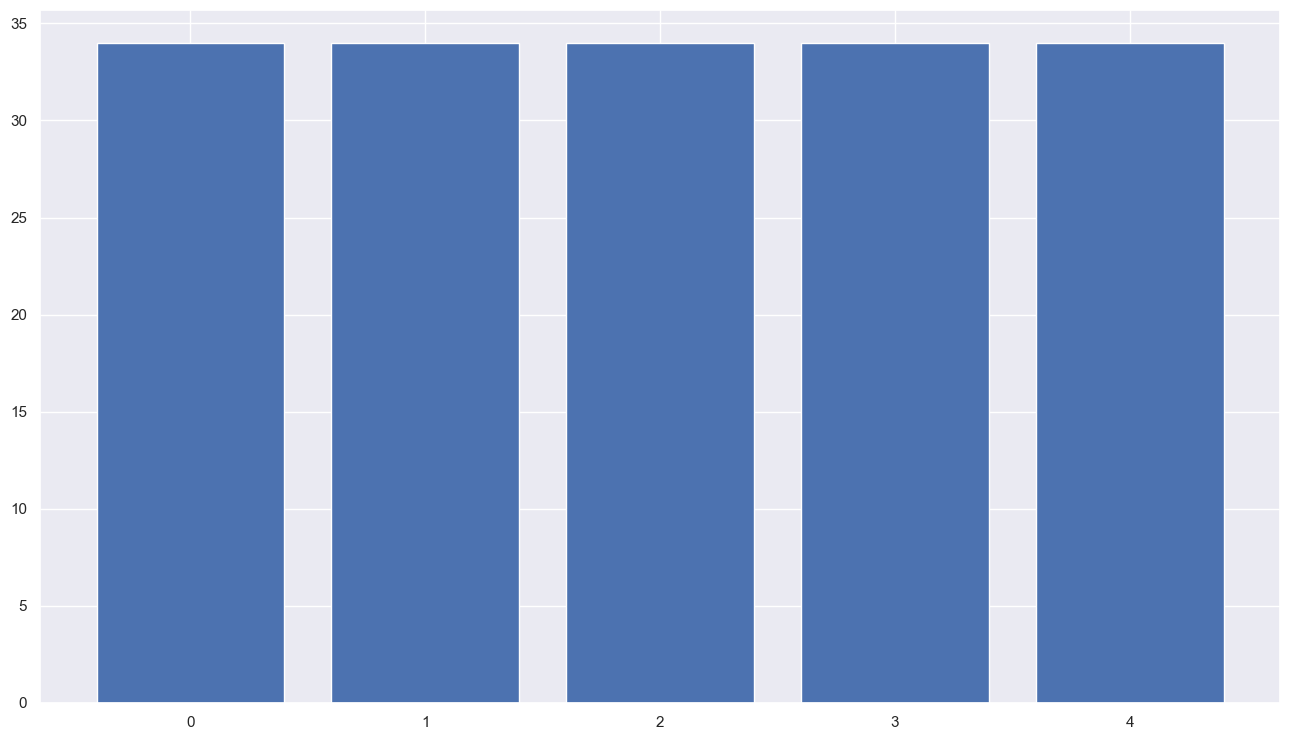

In [30]:
oversample = SMOTE(k_neighbors=2)
X = X_multi_train.values
y = y_multi_train

X, y = oversample.fit_resample(X, y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.show()

**Model**

In [31]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

one_rest_model1 = OneVsRestClassifier(LinearSVC(random_state=0))
one_rest_model1.fit(X,y)
one_rest_model2 = OneVsRestClassifier(LinearSVC(random_state=0))
one_rest_model2.fit(X_multi_train,y_multi_train)

c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\sit

OneVsRestClassifier(estimator=LinearSVC(random_state=0))

In [32]:
print("One Vs Rest Model")
predict1 = one_rest_model1.predict(X_multi_val)
predict2 = one_rest_model2.predict(X_multi_val)
print("Accurancy with SMOTE: ", metrics.accuracy_score(predict1, y_multi_val))
print("Accurancy without SMOTE: ", metrics.accuracy_score(predict2, y_multi_val))

One Vs Rest Model
Accurancy with SMOTE:  0.48148148148148145
Accurancy without SMOTE:  0.6296296296296297


c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


In [33]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

print("SVM Model")
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(X, y)
print('SMOTE',metrics.accuracy_score(clf.predict(X_multi_val), y_multi_val))
print('SMOTE',metrics.f1_score(clf.predict(X_multi_val), y_multi_val, average='macro'))

clf2 = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf2.fit(X_multi_train, y_multi_train)
print('Without SMOTE',metrics.accuracy_score(clf2.predict(X_multi_val), y_multi_val))
print('Without SMOTE',metrics.f1_score(clf2.predict(X_multi_val), y_multi_val, average= 'macro'))


SMOTE 0.5925925925925926
SMOTE 0.5667521367521368
Without SMOTE 0.6296296296296297
Without SMOTE 0.5263157894736843


c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [35]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=1000).fit(X, y)

print("MLP Model")
print('SMOTE',metrics.accuracy_score(clf.predict(X_multi_val), y_multi_val))
print('SMOTE',metrics.f1_score(clf.predict(X_multi_val), y_multi_val, average= 'macro'))

clf2 = MLPClassifier(random_state=1, max_iter=1000).fit(X_multi_train, y_multi_train)
print('Without SMOTE',metrics.accuracy_score(clf2.predict(X_multi_val), y_multi_val))
print('Without SMOTE',metrics.f1_score(clf2.predict(X_multi_val), y_multi_val, average= 'macro'))

MLP Model
SMOTE 0.5925925925925926
SMOTE 0.5183333333333333
Without SMOTE 0.48148148148148145
Without SMOTE 0.23200000000000004


c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

def evaluate_model(X, y, model):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

print("Random Forest Model")
classifier = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=10)
scores = evaluate_model(X_multi_train, y_multi_train, classifier)
classifier.fit(X_multi_train, y_multi_train)
y_multi_pred = classifier.predict(X_multi_val)
print("Accuracy Score: ",metrics.accuracy_score(y_multi_val, y_multi_pred))
print("F1 Score: ",metrics.f1_score(y_multi_val, y_multi_pred, average = 'macro'))

classifier2 = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=10)
classifier2.fit(X, y)
y_multi_pred = classifier2.predict(X_multi_val)
print("Accuracy Score: ",metrics.accuracy_score(y_multi_val, y_multi_pred))
print("F1 Score: ",metrics.f1_score(y_multi_val, y_multi_pred, average = 'macro'))

Random Forest Model


c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Accuracy Score:  0.7037037037037037
F1 Score:  0.5388888888888889
Accuracy Score:  0.7037037037037037
F1 Score:  0.5467320261437909


c:\Users\Chi Khang\anaconda3\envs\chikhang\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### **K-mean clustering**

In [41]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [42]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_multi_train)
    distortions.append(sum(np.min(cdist(X_multi_train, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X_multi_train.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(X_multi_train, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X_multi_train.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [43]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2.819706390980238
2 : 2.214056287813384
3 : 2.0241482251030116
4 : 1.9093509082985023
5 : 1.8203967755184556
6 : 1.7637665635523732
7 : 1.7279385925987623
8 : 1.6784240540361608
9 : 1.6354796567435064


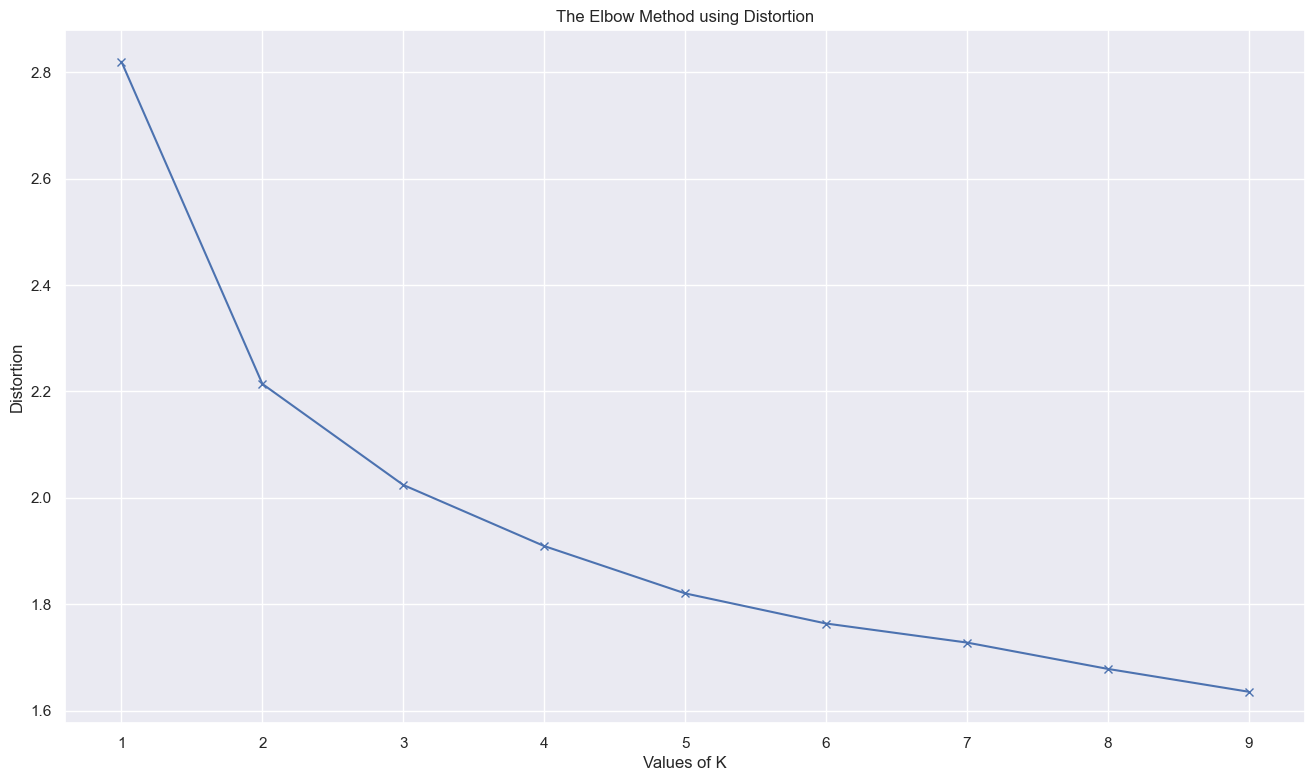

In [44]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [45]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 976.3240740740739
2 : 574.9005681818182
3 : 481.04153846153844
4 : 431.8935810775185
5 : 390.31897814450406
6 : 360.50993589743587
7 : 344.3970371733529
8 : 325.0002053502053
9 : 314.1453758230074


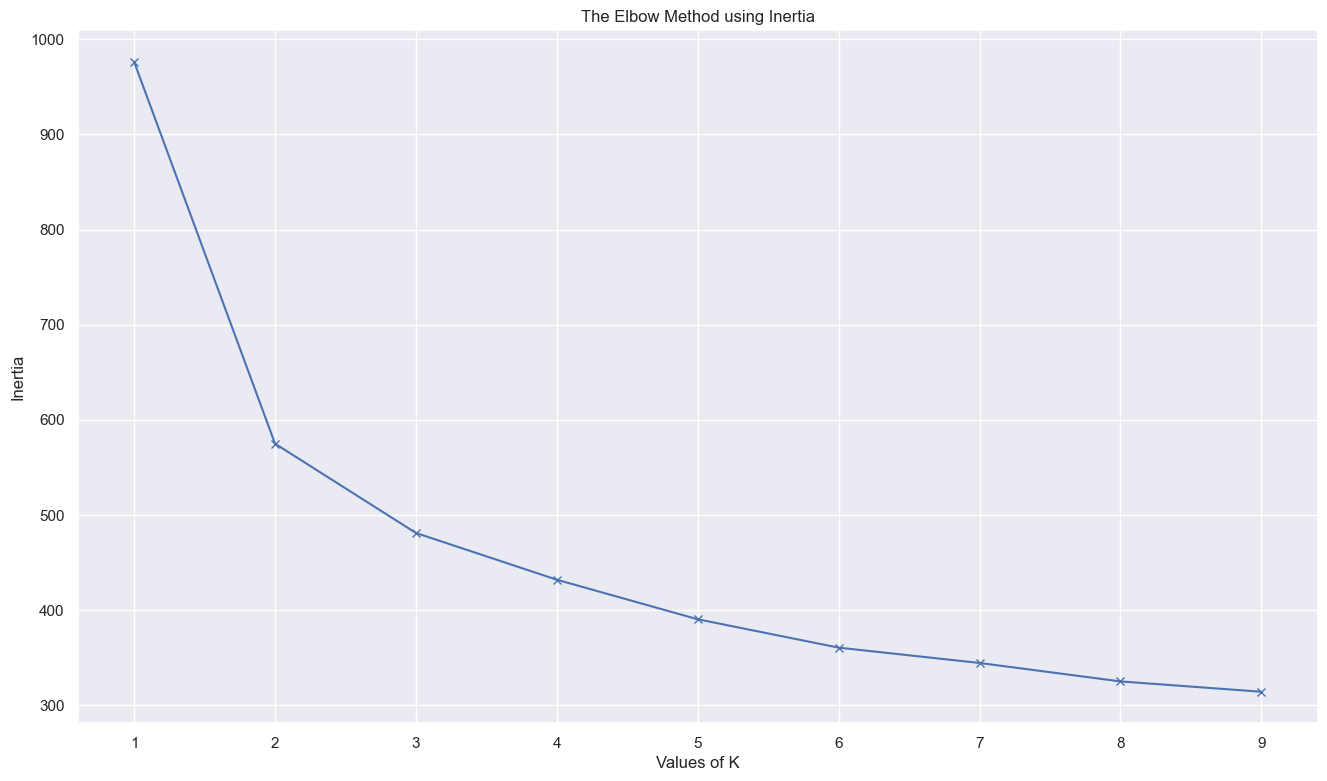

In [46]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()